Test EM on sample data

In [1]:
import EM as exp_max
from matplotlib import pyplot as plt
import numpy as np


In [2]:
def generate_mog_data(mu, sigma, pi, num_samples):
    n_components = len(pi)
    data = []
    label=[]
    for _ in range(num_samples):
        component = np.random.choice(n_components, p=pi)
        sample = np.random.normal(mu[component], np.sqrt(sigma[component]))
        data.append(sample)
        label.append(component)
    return np.array(data),np.array(label)

# Generate 300 new data points from the MoG
mu=np.array([-2, 0, 2])
sigma=np.array([1, 0.8, 2])
pi=np.array([0.2, 0.5, 0.3])
data,label = generate_mog_data(mu.flatten(), sigma.flatten(), pi, 300)


In [3]:
X1 = np.random.normal(0, 1, size=100)
X2 = np.random.normal(5, 1.5, size=100)
X3 = np.random.normal(2, 0.5, size=100)
X = np.hstack([X1, X2, X3])

In [4]:
X.shape

(300,)

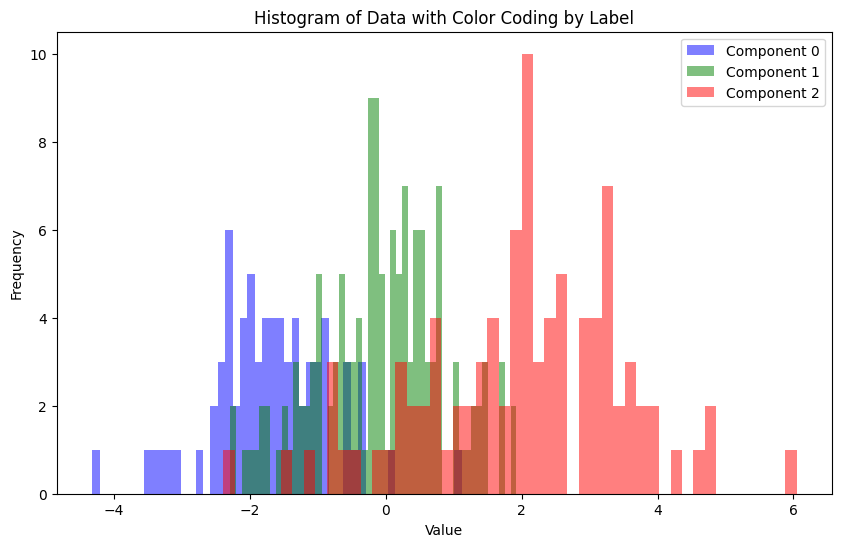

In [5]:
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']
for i in range(3):
    plt.hist(data[label == i], bins=50, alpha=0.5, label=f'Component {i}', color=colors[i])
plt.title('Histogram of Data with Color Coding by Label')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

In [9]:
data=X
# data=data.reshape(-1,1)
data.shape

(300,)

In [10]:
EM = exp_max.EM(data,3,1)

In [11]:
mu,sigma,pi = EM.run()

In [12]:
mu

array([ 1.86811164,  5.12255693, -0.33239824])

In [13]:
sigma

array([0.6774991 , 1.68296242, 0.80478634])

In [14]:
pi

array([0.4705279 , 0.30108624, 0.22838586])

In [15]:
data,label = generate_mog_data(mu.flatten(), sigma.flatten(), pi, 300)

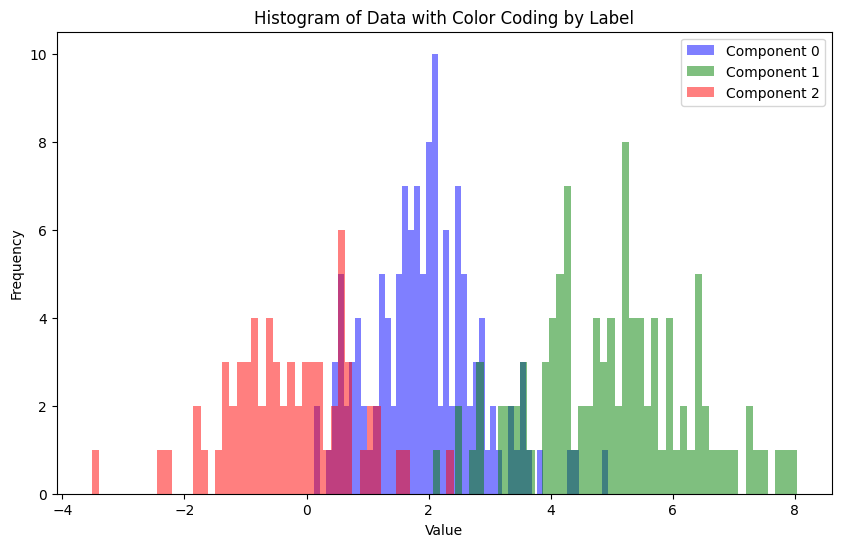

In [16]:
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']
for i in range(3):
    plt.hist(data[label == i], bins=50, alpha=0.5, label=f'Component {i}', color=colors[i])
plt.title('Histogram of Data with Color Coding by Label')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()